In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools import plotting
from collections import OrderedDict
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf
import statsmodels.formula as smff
import statsmodels.api as sm
import math
%matplotlib inline

C:\Users\windat059246\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
vic = pd.read_csv('victoria.csv', index_col=0)

In [4]:
vic.shape

(218, 15)

In [5]:
vic.tail()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
row.labels,,,,,,,,,,,,,,,
214,215000,7290000153,Z45,3B,18,3,4,E100,2A,1,0,0,S3,3A,1
215,340000,9561000061,Z56,2B,8,6,5,E50,1A,2,1,1,S3,3A,1
216,280000,8322000122,Z34,3B,29,7,5,E50,2B,1,1,1,S3,4A,1
217,224000,7920999908,Z38,4A,6,3,4,E100,1A,1,0,1,S3,3A,1
218,237000,8138999939,Z61,4B,20,2,4,E100,2B,1,0,1,S4,4A,1


In [6]:
vic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 1 to 218
Data columns (total 15 columns):
totalprice        218 non-null object
area              218 non-null object
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(7), object(8)
memory usage: 27.2+ KB


In [7]:
vic.isnull().sum()

totalprice        0
area              0
zone              0
category          0
age               0
floor             0
rooms             0
out               0
conservation      0
toilets           0
garage            0
elevator          0
streetcategory    0
heating           0
tras              0
dtype: int64

In [8]:
vic.describe()

,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


In [9]:
[key for key in dict(vic.dtypes) if dict(vic.dtypes)[key] in ['object']]

['totalprice',
 'area',
 'zone',
 'category',
 'out',
 'conservation',
 'streetcategory',
 'heating']

In [10]:
print(vic.zone.unique())
print(vic.category.unique())
print(vic.out.unique())
print(vic.conservation.unique())
print(vic.streetcategory.unique())
print(vic.heating.unique())

['Z45' 'Z31' 'Z52' 'Z62' 'Z11' 'Z47' 'Z48' 'Z37' 'Z21' 'Z36' 'Z61' 'Z46'
 'Z43' 'Z56' 'Z44' 'Z53' 'Z32' 'Z41' 'Z42' 'Z35' 'Z34' 'Z49' 'Z38']
['4B' '3B' '3A' '4A' '2B' '2A' '5A']
['E100' 'E50' 'E25' 'E75']
['2B' '1A' '2A' '3A']
['S3' 'S5' 'S2' 'S4']
['3A' '4A' '1A' '3B']


In [11]:
vic['totalprice']= vic['totalprice'].apply(lambda x:x.replace(',','.'))
vic['totalprice']= vic['totalprice'].astype(float)

vic['area']= vic['area'].apply(lambda x:x.replace(',','.'))
vic['area']= vic['area'].astype(float)

In [12]:
vic.dtypes

totalprice        float64
area              float64
zone               object
category           object
age                 int64
floor               int64
rooms               int64
out                object
conservation       object
toilets             int64
garage              int64
elevator            int64
streetcategory     object
heating            object
tras                int64
dtype: object

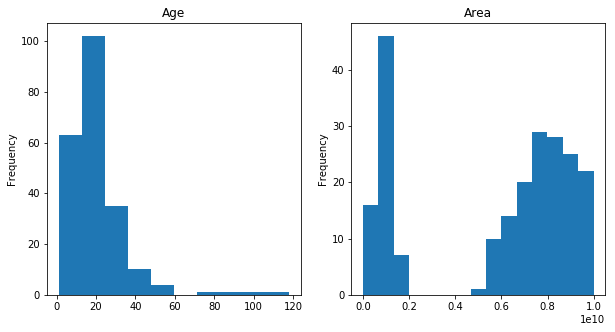

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(121)
vic['age'].plot.hist(bins=10, title='Age')
plt.subplot(122)
vic['area'].plot.hist(bins=15, title='Area')
plt.show()

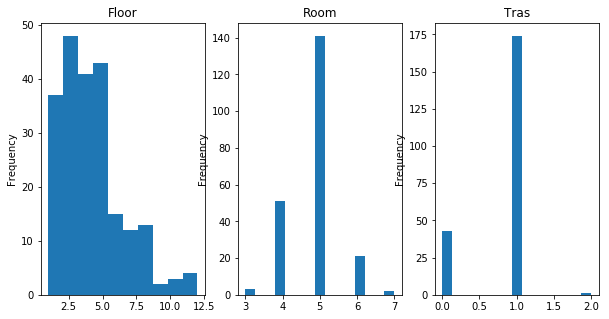

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(131)
vic['floor'].plot.hist(bins=10, title='Floor')
plt.subplot(132)
vic['rooms'].plot.hist(bins=15, title='Room')
plt.subplot(133)
vic['tras'].plot.hist(bins=15, title='Tras')
plt.show()

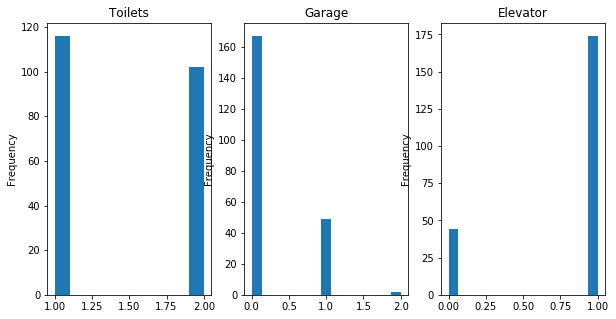

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(131)
vic['toilets'].plot.hist(bins=10, title='Toilets')
plt.subplot(132)
vic['garage'].plot.hist(bins=15, title='Garage')
plt.subplot(133)
vic['elevator'].plot.hist(bins=15, title='Elevator')
plt.show()

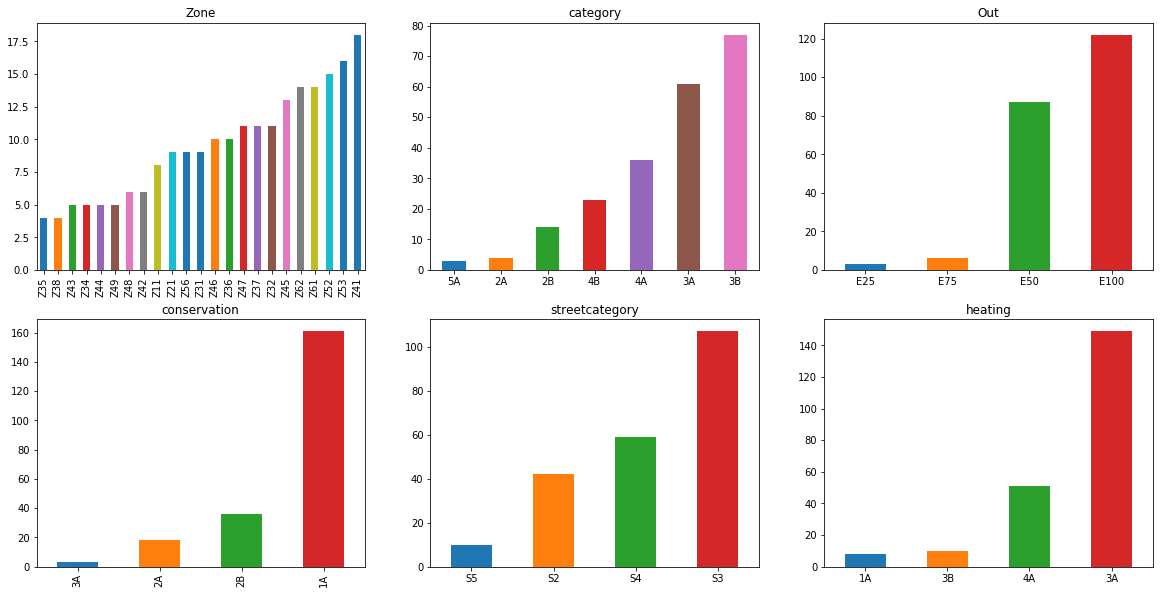

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(231)
vic['zone'].value_counts().sort_values(ascending= True).plot.bar(rot=90, title='Zone')
plt.subplot(232)
vic['category'].value_counts().sort_values(ascending= True).plot.bar(rot=0, title='category')
plt.subplot(233)
vic['out'].value_counts().sort_values(ascending= True).plot.bar(rot=0, title='Out')
plt.subplot(234)
vic['conservation'].value_counts().sort_values(ascending= True).plot.bar(rot=90, title='conservation')
plt.subplot(235)
vic['streetcategory'].value_counts().sort_values(ascending= True).plot.bar(rot=0, title='streetcategory')
plt.subplot(236)
vic['heating'].value_counts().sort_values(ascending= True).plot.bar(rot=0, title='heating')
plt.show()

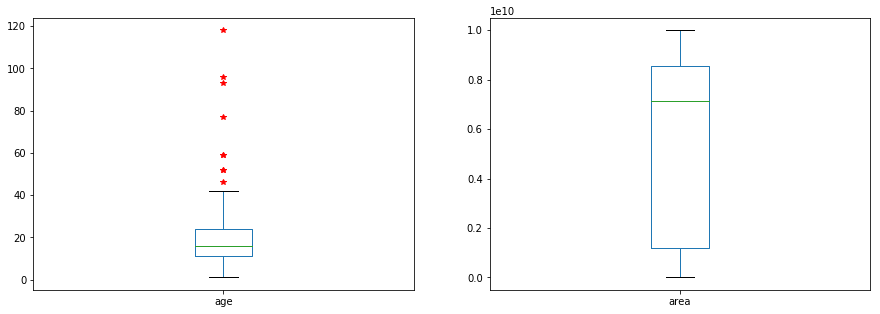

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(121)
vic.boxplot(column='age', sym='r*', grid=False)
plt.subplot(122)
vic.boxplot(column='area', sym='r*', grid=False)
plt.show()

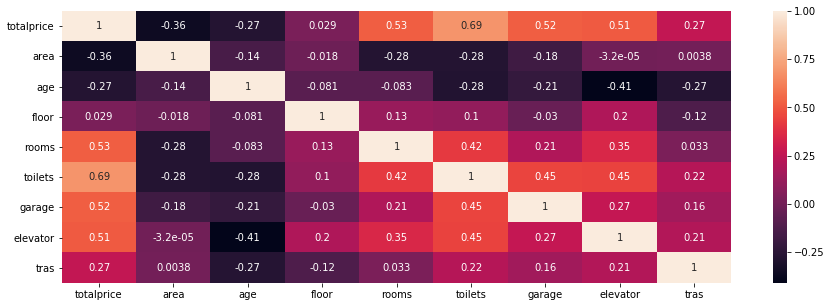

In [18]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(vic.corr(), annot=True)

In [19]:
train = pd.get_dummies(vic, columns=["zone","category","out","conservation","streetcategory","heating"], drop_first=True)

In [20]:
train.head()

,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras,zone_Z21,...,out_E75,conservation_2A,conservation_2B,conservation_3A,streetcategory_S3,streetcategory_S4,streetcategory_S5,heating_3A,heating_3B,heating_4A
row.labels,,,,,,,,,,,,,,,,,,,,,
1,228000.0,7.531000e+09,33,3,5,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
2,409000.0,1.006500e+09,5,7,5,2,1,1,1,0,...,0,0,0,0,0,0,1,0,0,1
3,200000.0,8.887000e+09,14,8,5,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,180000.0,6.261000e+09,41,3,4,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,443600.0,1.461500e+09,22,6,7,2,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [21]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [22]:
x = train.drop(['totalprice'],1)
y = train['totalprice']

In [23]:
result = stepwise_selection(x, y)

print('resulting features:')
print(result)

C:\Users\windat059246\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


Add  toilets                        with p-value 7.45071e-32
Add  rooms                          with p-value 5.48979e-08
Add  zone_Z21                       with p-value 9.62428e-08
Add  garage                         with p-value 1.03109e-09
Add  zone_Z31                       with p-value 3.90059e-08
Add  zone_Z42                       with p-value 4.60333e-06
Add  zone_Z37                       with p-value 1.75216e-05
Add  elevator                       with p-value 2.60091e-06
Add  category_2B                    with p-value 0.000184999
Add  zone_Z41                       with p-value 0.000637777
Add  zone_Z35                       with p-value 0.00401842
Add  tras                           with p-value 0.00257385
Add  zone_Z47                       with p-value 0.00600166
Add  heating_3A                     with p-value 0.0020588
Add  zone_Z52                       with p-value 0.00650632
resulting features:
['toilets', 'rooms', 'zone_Z21', 'garage', 'zone_Z31', 'zone_Z42', 'zon

In [24]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = 123)

In [25]:
lm = smf.ols(formula='totalprice~toilets+rooms+zone_Z21+garage+zone_Z31+zone_Z42+zone_Z37+elevator+category_2B+zone_Z41+zone_Z35+tras+zone_Z47+heating_3A+zone_Z52',data=train).fit()

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     72.36
Date:                Fri, 22 Jun 2018   Prob (F-statistic):           1.38e-72
Time:                        04:24:22   Log-Likelihood:                -2536.8
No. Observations:                 218   AIC:                             5106.
Df Residuals:                     202   BIC:                             5160.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.971e+04   1.75e+04      4.550      0.000    4.52e+04    1.14e+05
toilets      4.249e+04   5224.669      8.133      0.000    3.22e+04    5.28e+04
rooms         1.79e+04   3670.031      4.878      0.000    1.07e+04    2.51e+04
zone_Z21     8.607e+04   9979.721      8.625      0.000    6.64e+04    1.06e+05
garage        3.18e+04   5125.963      6.204      0.000    2.17e+04    4.19e+04
zone_Z31     8.122e+04   1.05e+04      7.766      0.000    6.06e+04    1.02e+05
zone_Z42     8.894e+04   1.26e+04      7.039      0.000     6.4e+04    1.14e+05
zone_Z37     5.793e+04   9077.016      6.382      0.000       4e+04    7.58e+04
elevator     3.268e+04   5795.914      5.639      0.000    2.13e+04    4.41e+04
category_2B  3.559e+04   8409.782      4.232      0.000     1.9e+04    5.22e+04
zone_Z41     2.189e+04   7620.775      2.873      0.005    6866.126    3.69e+04
zone_Z35     5.428e+04   1.48e+04      3.662      0.000    2.51e+04    8.35e+04
tras         1.706e+04   5099.234      3.346      0.001    7005.547    2.71e+04
zone_Z47    -3.651e+04   9495.305     -3.845      0.000   -5.52e+04   -1.78e+04
heating_3A  -1.435e+04   4627.522     -3.101      0.002   -2.35e+04   -5226.261
zone_Z52    -2.237e+04   8134.539     -2.750      0.007   -3.84e+04   -6327.961
==============================================================================
Omnibus:                        8.913   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               12.641
Skew:                           0.260   Prob(JB):                      0.00180
Kurtosis:                       4.058   Cond. No.                         51.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Plot Residual Normality')

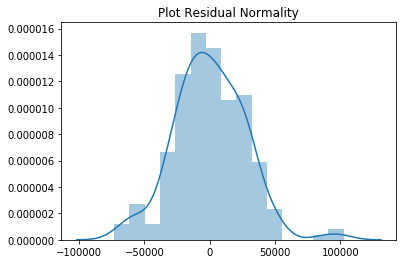

In [27]:
sns.distplot(lm.resid, hist=True)
plt.title("Plot Residual Normality")

In [28]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

test = sms.het_goldfeldquandt(lm.resid, lm.model.exog)
#exog : efek dari luar
test

(1.1814495167166978, 0.21145572529767756, 'increasing')

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
stepwise=train[['toilets', 'rooms', 'zone_Z21', 'garage', 'zone_Z31', 'zone_Z42', 'zone_Z37', 'elevator', 'category_2B', 'zone_Z41', 'zone_Z35', 'tras', 'zone_Z47', 'heating_3A', 'zone_Z52']]
#check for multicolinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(stepwise.values, i) for i in range(stepwise.shape[1])]
vif["features"] = stepwise.columns
vif.round(1)

,VIF Factor,features
0,17.6,toilets
1,20.3,rooms
2,1.1,zone_Z21
3,1.8,garage
4,1.2,zone_Z31
5,1.2,zone_Z42
6,1.1,zone_Z37
7,7.2,elevator
8,1.2,category_2B
9,1.3,zone_Z41


In [32]:
from scipy import stats
stats.shapiro(lm.resid)

(0.9833957552909851, 0.011606808751821518)

In [33]:
influence = lm.get_influence()
resid_student = influence.resid_studentized_external
resid = pd.concat([train_x, pd.Series(resid_student, name ="Studentized Residual")], axis = 1)
resid.head()

,area,age,floor,rooms,toilets,garage,elevator,tras,zone_Z21,zone_Z31,...,conservation_2A,conservation_2B,conservation_3A,streetcategory_S3,streetcategory_S4,streetcategory_S5,heating_3A,heating_3B,heating_4A,Studentized Residual
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073314
1,7.531000e+09,33.0,3.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.301227
2,1.006500e+09,5.0,7.0,5.0,2.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.864222
3,8.887000e+09,14.0,8.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.500737
4,6.261000e+09,41.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.858754


In [34]:
resid.loc[np.abs(resid["Studentized Residual"])>3,:]

,area,age,floor,rooms,toilets,garage,elevator,tras,zone_Z21,zone_Z31,...,conservation_2A,conservation_2B,conservation_3A,streetcategory_S3,streetcategory_S4,streetcategory_S5,heating_3A,heating_3B,heating_4A,Studentized Residual
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.458182
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.525065
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.984243


In [36]:
train['ruang'] = train['toilets'] + train['toilets']

In [37]:
lm = smf.ols(formula='totalprice~ruang+zone_Z21+garage+zone_Z31+zone_Z42+zone_Z37+elevator+category_2B+zone_Z41+zone_Z35+tras+zone_Z47+heating_3A+zone_Z52',data=train).fit()

In [38]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     68.18
Date:                Fri, 22 Jun 2018   Prob (F-statistic):           1.09e-68
Time:                        04:33:53   Log-Likelihood:                -2548.9
No. Observations:                 218   AIC:                             5128.
Df Residuals:                     203   BIC:                             5179.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.545e+05   8941.316     17.279      0.000    1.37e+05    1.72e+05
ruang        2.447e+04   2665.296      9.182      0.000    1.92e+04    2.97e+04
zone_Z21     8.151e+04   1.05e+04      7.778      0.000    6.08e+04    1.02e+05
garage       3.188e+04   5406.090      5.897      0.000    2.12e+04    4.25e+04
zone_Z31     9.087e+04   1.08e+04      8.390      0.000    6.95e+04    1.12e+05
zone_Z42     9.441e+04   1.33e+04      7.113      0.000    6.82e+04    1.21e+05
zone_Z37     6.468e+04   9461.108      6.836      0.000     4.6e+04    8.33e+04
elevator     3.944e+04   5935.640      6.644      0.000    2.77e+04    5.11e+04
category_2B   3.51e+04   8868.771      3.958      0.000    1.76e+04    5.26e+04
zone_Z41     2.195e+04   8037.271      2.731      0.007    6099.296    3.78e+04
zone_Z35     6.064e+04   1.56e+04      3.895      0.000    2.99e+04    9.13e+04
tras         1.516e+04   5362.284      2.828      0.005    4591.362    2.57e+04
zone_Z47    -4.425e+04   9873.458     -4.482      0.000   -6.37e+04   -2.48e+04
heating_3A  -1.696e+04   4847.741     -3.498      0.001   -2.65e+04   -7400.765
zone_Z52    -2.052e+04   8569.798     -2.394      0.018   -3.74e+04   -3620.614
==============================================================================
Omnibus:                        9.670   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               12.413
Skew:                           0.330   Prob(JB):                      0.00202
Kurtosis:                       3.965   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Plot Residual Normality')

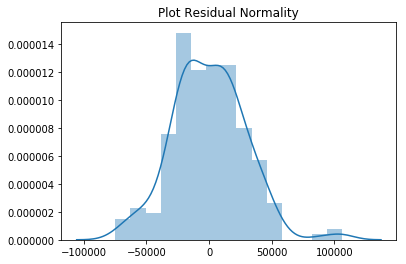

In [39]:
sns.distplot(lm.resid, hist=True)
plt.title("Plot Residual Normality")

In [40]:

test = sms.het_goldfeldquandt(lm.resid, lm.model.exog)
#exog : efek dari luar
test

(1.1210907240560184, 0.29031036155886275, 'increasing')

In [42]:
stepwise=train[['ruang', 'zone_Z21', 'garage', 'zone_Z31', 'zone_Z42', 'zone_Z37', 'elevator', 'category_2B', 'zone_Z41', 'zone_Z35', 'tras', 'zone_Z47', 'heating_3A', 'zone_Z52']]
#check for multicolinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(stepwise.values, i) for i in range(stepwise.shape[1])]
vif["features"] = stepwise.columns
vif.round(1)

,VIF Factor,features
0,10.8,ruang
1,1.1,zone_Z21
2,1.8,garage
3,1.2,zone_Z31
4,1.1,zone_Z42
5,1.1,zone_Z37
6,6.4,elevator
7,1.2,category_2B
8,1.3,zone_Z41
9,1.1,zone_Z35
